In [ ]:
import pandas as pd
import numpy as np

In [2]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving One_Hot_Encoding.csv to One_Hot_Encoding.csv


In [ ]:
df  = pd.read_csv('One_Hot_Encoding.csv', encoding = 'utf-8')
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,No.,Creator,Label,Question,Answer,Question_Encoded,Question_vector,Tokenized,CN,Chung
0,0,0,0,1,Thiện,CN,yêu công nghệ thông năng lực thi trường nộp đơ...,Em nên nhớ là học sinh sẽ được nộp đơn sau khi...,373,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"['yêu', 'công', 'nghệ', 'thông', 'năng', 'lực'...",1,0
1,1,1,1,2,Thiện,CN,học cntt giỏi toán học 2 môn tòi máy web game,Không có 1 tiêu chuẩn nào cho 1 người là dân I...,425,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"['học', 'cntt', 'giỏi', 'toán', 'học', '2', 'm...",1,0
2,2,2,2,3,Thiện,CN,học cn vất lắm kêu lắm,"Học CN vất với những người lười, không có đam ...",423,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"['học', 'cn', 'vất', 'lắm', 'kêu', 'lắm']",1,0
3,3,3,3,4,Thiện,Chung,ngoại ngữ,Khi học ở FPT thì việc này vô cùng quan trọng....,246,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"['ngoại', 'ngữ']",0,1
4,4,4,4,5,Thiện,Chung,học tiếng trường,Có 6 level tiếng Anh. Trước khi vào trường bạn...,793,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"['học', 'tiếng', 'trường']",0,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['Question'])
X = count_vectorizer.fit_transform(df['Question']).toarray()
X.shape

(996, 649)

Training Model


In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False)

y  = onehot.fit_transform(df[['Label']])
len(y[0])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.layers.regularization.dropout import Dropout
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization

model = Sequential()
model.add(BatchNormalization(input_dim=649))
model.add(Dense(100, kernel_initializer='he_uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())


In [ ]:
model.add(Dense(units=200,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(units=150,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(units=100,kernel_initializer='normal',activation='relu'))

In [ ]:
model.add(Dense(2, activation='sigmoid'))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split training and testing data
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.3,random_state=42)
# creating object
stand= StandardScaler()
# fit data
Fit= stand.fit(Xtrain)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split training and testing data
Xtrain,Xtest,ytrain,ytest= train_test_split(
                                            X,y,
                                            test_size=0.3,
                                            random_state=42
                                           )
# creating object
stand= StandardScaler()
# fit data
Fit= stand.fit(Xtrain)
# transform data
X_scaled = Fit.transform(Xtrain)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# split training and testing data
Xtrain,Xtest,ytrain,ytest= train_test_split(
                                            X,y,
                                            test_size=0.3,
                                            random_state=42
                                           )
stand= StandardScaler()
Fit_Transform = stand.fit_transform(Xtrain)
Fit_Transform

array([[ 0.        ,  0.        , -0.0379049 , ..., -0.0379049 ,
        -0.0379049 , -0.12662932],
       [ 0.        ,  0.        , -0.0379049 , ..., -0.0379049 ,
        -0.0379049 , -0.12662932],
       [ 0.        ,  0.        , -0.0379049 , ..., -0.0379049 ,
        -0.0379049 , -0.12662932],
       ...,
       [ 0.        ,  0.        , -0.0379049 , ..., -0.0379049 ,
        -0.0379049 , -0.12662932],
       [ 0.        ,  0.        , -0.0379049 , ..., -0.0379049 ,
        -0.0379049 , -0.12662932],
       [ 0.        ,  0.        , -0.0379049 , ..., -0.0379049 ,
        -0.0379049 , -0.12662932]])

In [ ]:
ytrain.shape

(697, 2)

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, monitor='val_loss', mode='min')
#binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=100, verbose=1, validation_data=(X_test, y_test), callbacks=[ early_stopping,model_checkpoint, reduce_lr])

Epoch 1/100
22/22 [==============================] - 3s 22ms/step - loss: 0.6422 - accuracy: 0.6112 - val_loss: 0.6428 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/100
22/22 [==============================] - 0s 11ms/step - loss: 0.4343 - accuracy: 0.8092 - val_loss: 0.5608 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 3/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2955 - accuracy: 0.8737 - val_loss: 0.4401 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 4/100
22/22 [==============================] - 0s 11ms/step - loss: 0.2031 - accuracy: 0.9254 - val_loss: 0.3591 - val_accuracy: 0.8050 - lr: 0.0010
Epoch 5/100
22/22 [==============================] - 0s 11ms/step - loss: 0.1359 - accuracy: 0.9541 - val_loss: 0.2745 - val_accuracy: 0.8600 - lr: 0.0010
Epoch 6/100
22/22 [==============================] - 0s 11ms/step - loss: 0.1118 - accuracy: 0.9555 - val_loss: 0.2230 - val_accuracy: 0.9150 - lr: 0.0010
Epoch 7/100
22/22 [==============================] - 0s 12ms/step - lo

In [ ]:
# Kiểm tra trên tập test
results = model.evaluate(X_test, y_test)
print('Test loss: {:4f}'.format(results[0]))
print('Test accuracy: {:4f}'.format(results[1]))

7/7 [==============================] - 0s 4ms/step - loss: 0.0951 - accuracy: 0.9700
Test loss: 0.095142
Test accuracy: 0.970000


Minimum validation loss: 0.09514185041189194


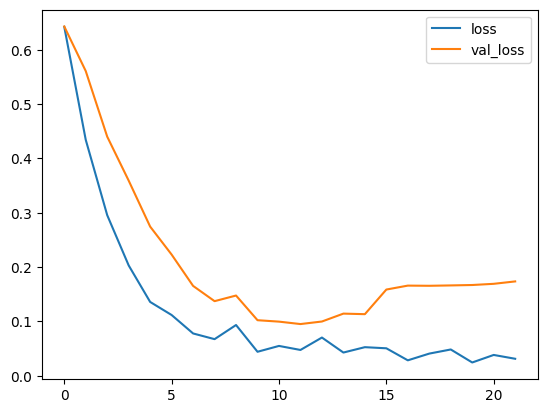

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [ ]:
model.save("model.h5")

In [ ]:
import joblib

joblib.dump(count_vectorizer, 'count_vectorizer.joblib')
joblib.dump(onehot, 'one_hot_encoder.joblib')

['one_hot_encoder.joblib']

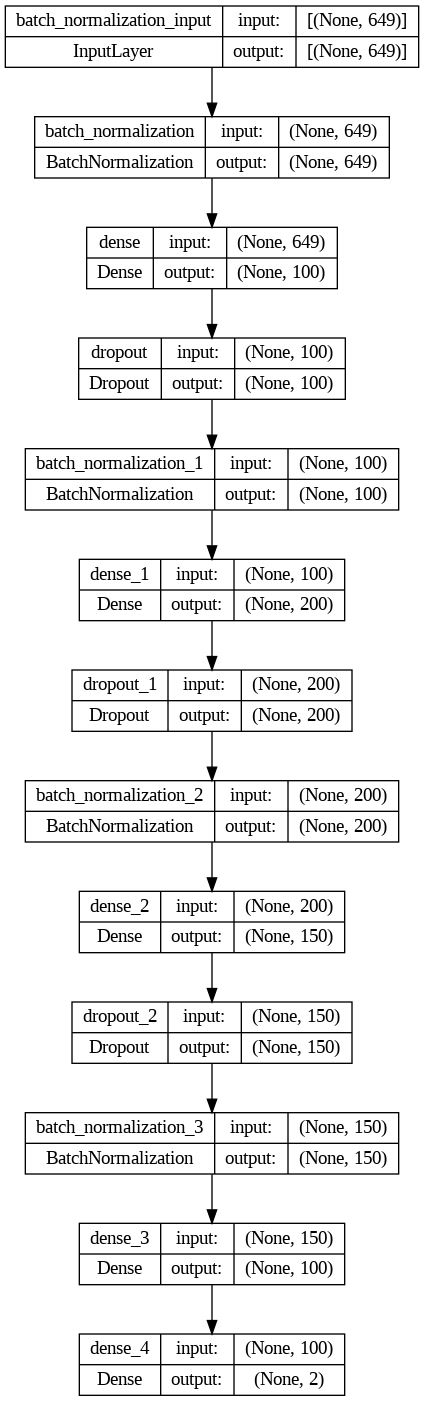

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_visualization.png', show_shapes=True)

In [ ]:
# Dự đoán nhãn cho tập kiểm tra
y_pred = model.predict(X_test)

# Chuyển đổi dạng dự đoán thành nhãn dự đoán
y_pred_classes = (y_pred > 0.5).astype(int)

7/7 [==============================] - 0s 7ms/step


In [ ]:
y_pred_label = onehot.inverse_transform(y_pred)
y_test_label = onehot.inverse_transform(y_test)
y_train_label = onehot.inverse_transform(y_train)

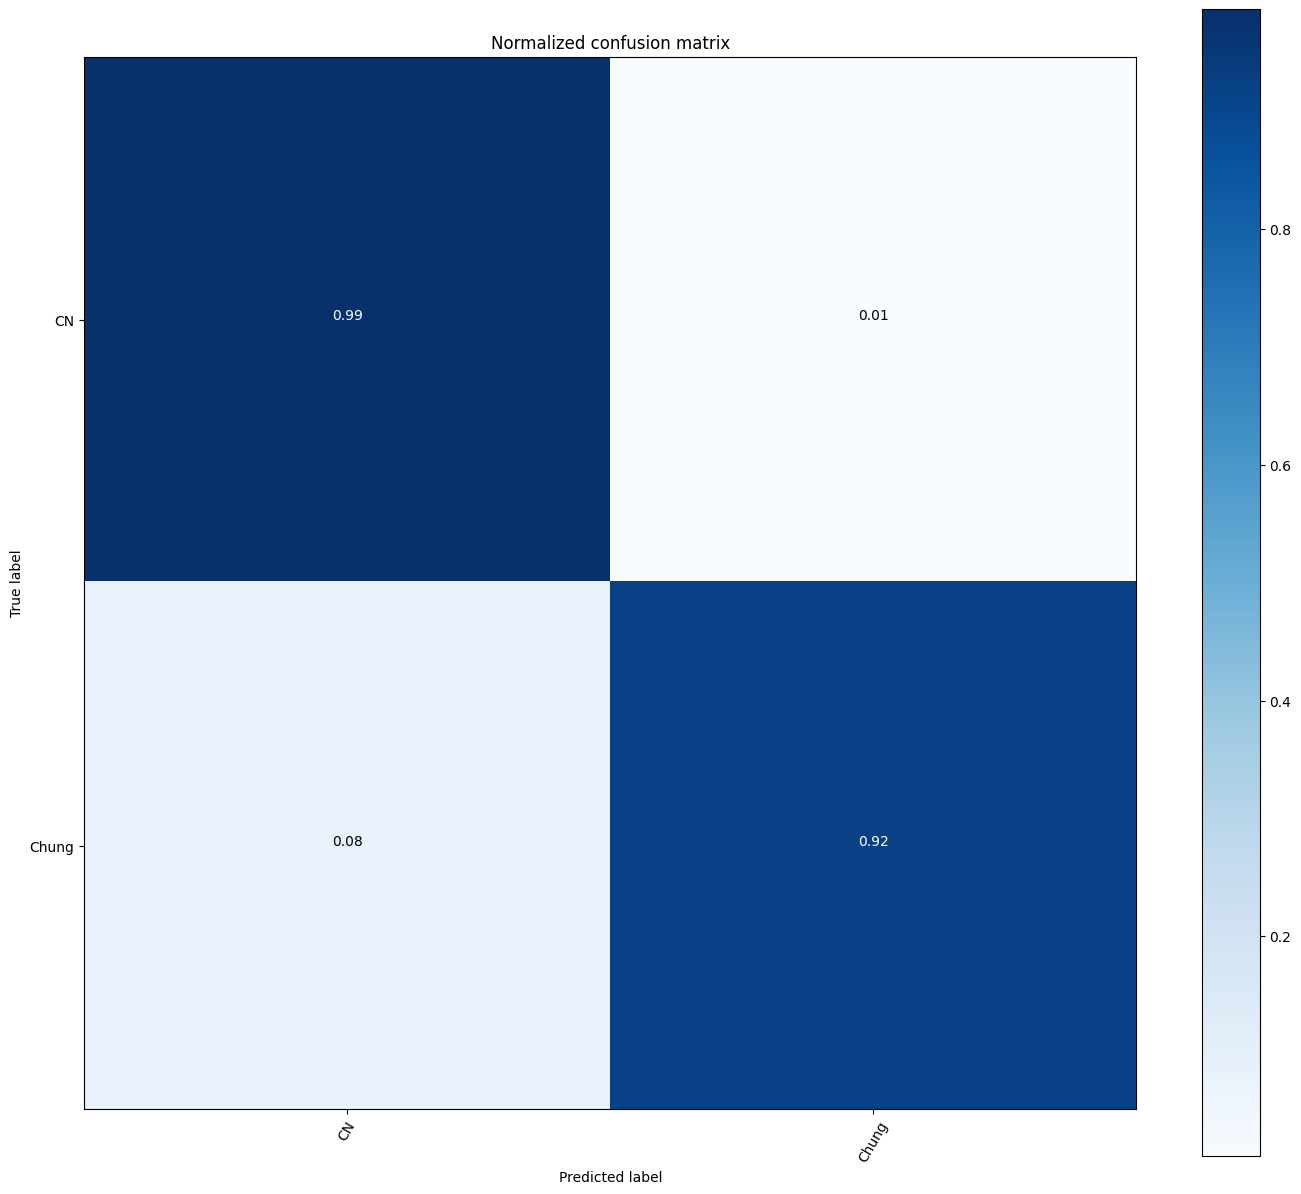

In [ ]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test_label, y_pred_label)

import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = onehot.categories_[0]
# # plt.figure()
# plt.figure(figsize=(14, 12))

# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plt.figure()
plt.figure(figsize=(14, 12))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.xticks(rotation=60)
plt.savefig('confusion_matrix.png')

plt.show()